In [193]:
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras import layers
scrstand = StandardScaler()

In [798]:
raw_data = pd.read_csv('train.csv')

In [799]:
raw_data.shape

(891, 12)

In [800]:
def pre_process(raw_data):
    raw_data['Sex'].replace({'male':0,'female':1}, inplace=True)
    raw_data.Age = scrstand.fit_transform(raw_data.Age.values.reshape(-1,1))
    raw_data.Fare = scrstand.fit_transform(raw_data.Fare.values.reshape(-1,1))
    dummies = pd.get_dummies(raw_data['Embarked'])
    dummies_par = pd.get_dummies(raw_data['Parch'],prefix='P')
    dumm_new = pd.get_dummies(raw_data['SibSp'],prefix='S')
    dummies_P  = pd.get_dummies(raw_data['Pclass'],prefix='Pr')
    new_data = pd.concat([raw_data,dummies,dumm_new,dummies_P,dummies_par],axis=1)
    new_data.drop(['Embarked','Fare','Pclass','SibSp','Cabin','Ticket','Name','PassengerId'], axis=1,inplace=True)
    return new_data
    
    

In [801]:
data = pre_process(raw_data)

In [802]:
data.columns

Index(['Survived', 'Sex', 'Age', 'Parch', 'C', 'Q', 'S', 'S_0', 'S_1', 'S_2',
       'S_3', 'S_4', 'S_5', 'S_8', 'Pr_1', 'Pr_2', 'Pr_3', 'P_0', 'P_1', 'P_2',
       'P_3', 'P_4', 'P_5', 'P_6'],
      dtype='object')

In [803]:
data.head(5)

,Survived,Sex,Age,Parch,C,Q,S,S_0,S_1,S_2,...,Pr_1,Pr_2,Pr_3,P_0,P_1,P_2,P_3,P_4,P_5,P_6
0,0,0,-0.530377,0,0,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,0
1,1,1,0.571831,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,1,-0.254825,0,0,0,1,1,0,0,...,0,0,1,1,0,0,0,0,0,0
3,1,1,0.365167,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,0,0,0.365167,0,0,0,1,1,0,0,...,0,0,1,1,0,0,0,0,0,0


In [828]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [804]:
data.isnull().sum()

## Cabin as huge amount of null data discarding the column

Survived      0
Sex           0
Age         177
Parch         0
C             0
Q             0
S             0
S_0           0
S_1           0
S_2           0
S_3           0
S_4           0
S_5           0
S_8           0
Pr_1          0
Pr_2          0
Pr_3          0
P_0           0
P_1           0
P_2           0
P_3           0
P_4           0
P_5           0
P_6           0
dtype: int64

In [712]:
data.corr()

,Survived,Sex,Age,Parch,C,Q,S,S_0,S_1,S_2,...,Pr_1,Pr_2,Pr_3,P_0,P_1,P_2,P_3,P_4,P_5,P_6
Survived,1.000000,0.543351,-0.077221,0.081629,0.168240,0.003650,-0.155660,-0.115867,0.173076,0.029796,...,0.285904,0.093349,-0.322308,-0.147408,0.134174,0.075020,0.033391,-0.053002,-0.028398,-0.026456
Sex,0.543351,1.000000,-0.093254,0.245489,0.082853,0.074115,-0.125722,-0.203203,0.179339,0.042182,...,0.098013,0.064746,-0.137143,-0.247523,0.127636,0.170993,0.070383,0.020746,0.070383,0.045439
Age,-0.077221,-0.093254,1.000000,-0.189119,0.036261,-0.022405,-0.032523,0.162893,0.015797,-0.092893,...,0.348941,0.006954,-0.312271,0.280626,-0.155138,-0.278980,0.020253,0.076530,0.054963,0.034315
Parch,0.081629,0.245489,-0.189119,1.000000,-0.011069,-0.081228,0.063036,-0.356133,0.188220,0.058416,...,-0.017633,-0.000734,0.015790,-0.845092,0.299918,0.630957,0.244165,0.301622,0.430664,0.233774
C,0.168240,0.082853,0.036261,-0.011069,1.000000,-0.148258,-0.778359,-0.034759,0.092043,0.011850,...,0.296423,-0.125416,-0.153329,-0.032550,0.065610,-0.010882,0.002199,-0.032371,-0.036212,-0.016158
Q,0.003650,0.074115,-0.022405,-0.081228,-0.148258,1.000000,-0.496624,0.055398,-0.066568,0.013285,...,-0.155342,-0.127301,0.237449,0.097467,-0.049463,-0.082626,-0.023105,-0.020654,0.030366,-0.010310
S,-0.155660,-0.125722,-0.032523,0.063036,-0.778359,-0.496624,1.000000,-0.007822,-0.035869,-0.017791,...,-0.170379,0.192061,-0.009511,-0.035549,-0.024325,0.062950,0.012959,0.041589,0.012959,0.020759
S_0,-0.115867,-0.203203,0.162893,-0.356133,-0.034759,0.055398,-0.007822,1.000000,-0.811408,-0.264017,...,-0.058470,-0.033099,0.077316,0.420233,-0.302415,-0.215801,-0.077838,-0.062369,-0.045565,-0.049132
S_1,0.173076,0.179339,0.015797,0.188220,0.092043,-0.066568,-0.035869,-0.811408,1.000000,-0.099714,...,0.125673,0.077469,-0.171329,-0.223798,0.229119,0.002173,0.064787,0.081687,0.064787,0.060551
S_2,0.029796,0.042182,-0.092893,0.058416,0.011850,0.013285,-0.017791,-0.264017,-0.099714,1.000000,...,-0.026838,0.035244,-0.005560,-0.080037,0.062474,0.033439,0.072586,-0.012096,-0.013531,-0.006038


In [254]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,Fare,C,Q,S,S_0,...,S_4,S_5,S_8,P_0,P_1,P_2,P_3,P_4,P_5,P_6
count,891.000000,891.000000,891.000000,891.000000,7.140000e+02,8.910000e+02,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,2.174187e-16,-4.373606e-17,0.188552,0.086420,0.722783,0.682379,...,0.020202,0.005612,0.007856,0.760943,0.132435,0.089787,0.005612,0.004489,0.005612,0.001122
std,257.353842,0.486592,0.836071,0.477990,1.000701e+00,1.000562e+00,0.391372,0.281141,0.447876,0.465813,...,0.140770,0.074743,0.088337,0.426747,0.339154,0.286037,0.074743,0.066890,0.074743,0.033501
min,1.000000,0.000000,1.000000,0.000000,-2.016979e+00,-6.484217e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,-6.595416e-01,-4.891482e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,-1.170488e-01,-3.573909e-01,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,5.718310e-01,-2.424635e-02,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,3.465126e+00,9.667167e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


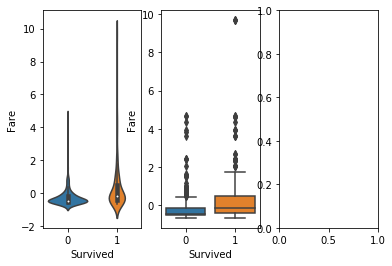

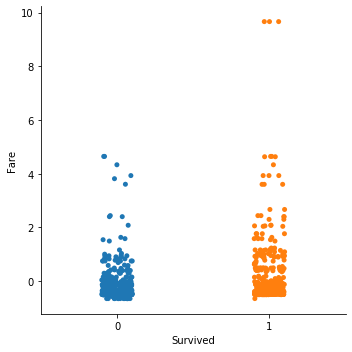

In [255]:
plt.subplot(1,3,1)
sns.violinplot(x="Survived", y="Fare", data=data)
plt.subplot(1,3,2)
sns.boxplot(x="Survived", y="Fare", data=data)
plt.subplot(1,3,3)
sns.catplot(x="Survived", y="Fare", data=data)

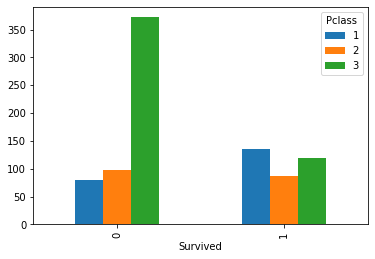

In [256]:
pd.crosstab(data['Survived'],data['Pclass']).plot(kind='bar')

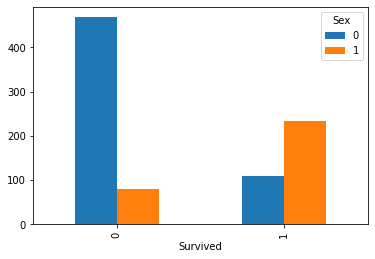

In [257]:
pd.crosstab(data['Survived'],data['Sex']).plot(kind='bar')

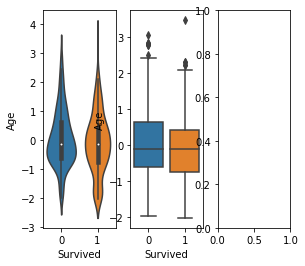

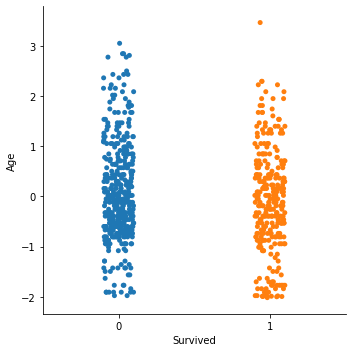

In [258]:
plt.subplot(1,4,1)
sns.violinplot(x="Survived", y="Age", data=data)
plt.subplot(1,4,2)
sns.boxplot(x="Survived", y="Age", data=data)
plt.subplot(1,4,3)
sns.catplot(x="Survived", y="Age", data=data)



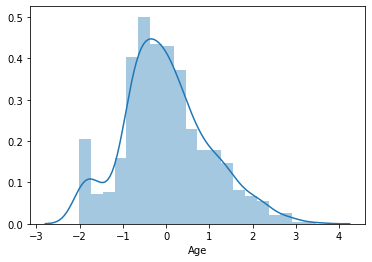

In [259]:
sns.distplot(data['Age'])

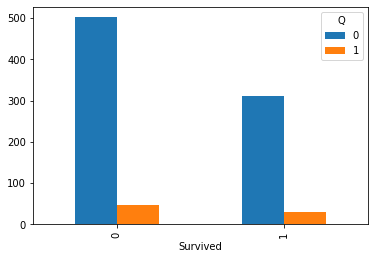

In [261]:
pd.crosstab(data['Survived'],data['Q']).plot(kind='bar')

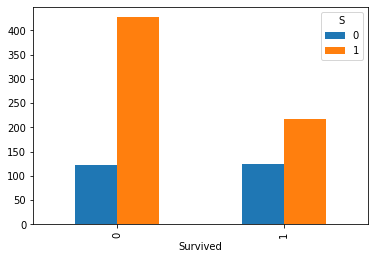

In [262]:
pd.crosstab(data['Survived'],data['S']).plot(kind='bar')

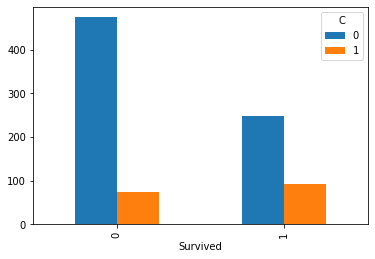

In [263]:
pd.crosstab(data['Survived'],data['C']).plot(kind='bar')

In [805]:
Y = data['Survived']

In [806]:
data["Age"].fillna(np.mean(data.Age), inplace = True) 

In [807]:
data.drop('Survived', axis=1,inplace=True)

In [808]:
X = data

In [809]:
X.shape

(891, 23)

In [810]:
x_train, x_test, y_train,y_test = train_test_split(X,Y, test_size=0.3)

In [811]:
clf = RandomForestClassifier(n_estimators=120)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [812]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [813]:
ada = AdaBoostClassifier(n_estimators=130, learning_rate=1)

In [814]:
ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=130, random_state=None)

In [815]:
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [816]:
cld_sv  =  svm.SVC()

In [817]:
cld_sv.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [818]:
for i in [clf,log,ada,cld_sv]:
    y_pred = i.predict(x_test)
    print(classification_report(y_test,y_pred))
    

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       176
           1       0.68      0.68      0.68        92

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       176
           1       0.77      0.76      0.77        92

    accuracy                           0.84       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.84      0.84      0.84       268

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       176
           1       0.74      0.74      0.74        92

    accuracy                           0.82       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268

              preci

In [821]:
y_pred = cld_sv.predict(x_test)

In [822]:
accuracy_score(y_test,y_pred)

0.8395522388059702

In [823]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.86      0.90      0.88       176\n           1       0.80      0.72      0.75        92\n\n    accuracy                           0.84       268\n   macro avg       0.83      0.81      0.82       268\nweighted avg       0.84      0.84      0.84       268\n'

In [829]:
test_data = pd.read_csv('test.csv')

In [830]:
new_test_data = pre_process(test_data)

In [831]:
new_test_data['Parch'].value_counts()

0    324
1     52
2     33
6      3
3      3
4      2
5      1
Name: Parch, dtype: int64

In [832]:
new_test_data['Age'].fillna(np.mean(new_test_data['Age']), inplace=True)
#new_test_data['Fare'].fillna(np.mean(new_test_data['Fare']), inplace=True)

In [833]:
new_test_data.isnull().sum()

Sex      0
Age      0
Parch    0
C        0
Q        0
S        0
S_0      0
S_1      0
S_2      0
S_3      0
S_4      0
S_5      0
S_8      0
Pr_1     0
Pr_2     0
Pr_3     0
P_0      0
P_1      0
P_2      0
P_3      0
P_4      0
P_5      0
P_6      0
dtype: int64

In [834]:
new_test_data.shape

(418, 23)

In [835]:
y_pred_test = cld_sv.predict(new_test_data)

In [836]:
y_pred_test

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [837]:
sub = pd.read_csv('gender_submission.csv')

In [838]:
sub['Survived'] = y_pred_test

In [839]:
sub.to_csv('submission_3.csv')

In [778]:
model_dense = Sequential()
model_dense.add(layers.Dense(10, input_dim=x_train.shape[1],activation='relu'))
model_dense.add(layers.Dropout(0.2))
model_dense.add(layers.Dense(1,activation= 'sigmoid'))
model_dense.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [781]:
model_dense.fit(x_train,y_train, batch_size=100, epochs=200)

Train on 623 samples
Epoch 1/200
623/623 [==============================] - 0s 47us/sample - loss: 0.4162 - acc: 0.8299
Epoch 2/200
623/623 [==============================] - 0s 37us/sample - loss: 0.4155 - acc: 0.8218
Epoch 3/200
623/623 [==============================] - 0s 36us/sample - loss: 0.4124 - acc: 0.8186
Epoch 4/200
623/623 [==============================] - 0s 37us/sample - loss: 0.4150 - acc: 0.8138
Epoch 5/200
623/623 [==============================] - 0s 38us/sample - loss: 0.4214 - acc: 0.8186
Epoch 6/200
623/623 [==============================] - 0s 37us/sample - loss: 0.4173 - acc: 0.8218
Epoch 7/200
623/623 [==============================] - 0s 39us/sample - loss: 0.4093 - acc: 0.8427
Epoch 8/200
623/623 [==============================] - 0s 37us/sample - loss: 0.4207 - acc: 0.8234
Epoch 9/200
623/623 [==============================] - 0s 36us/sample - loss: 0.4217 - acc: 0.8234
Epoch 10/200
623/623 [==============================] - 0s 43us/sample - loss: 0.4121 - 

623/623 [==============================] - 0s 33us/sample - loss: 0.4057 - acc: 0.8347
Epoch 83/200
623/623 [==============================] - 0s 34us/sample - loss: 0.4186 - acc: 0.8058
Epoch 84/200
623/623 [==============================] - 0s 31us/sample - loss: 0.4063 - acc: 0.8154
Epoch 85/200
623/623 [==============================] - 0s 38us/sample - loss: 0.4209 - acc: 0.8250
Epoch 86/200
623/623 [==============================] - 0s 27us/sample - loss: 0.4171 - acc: 0.8202
Epoch 87/200
623/623 [==============================] - 0s 36us/sample - loss: 0.4091 - acc: 0.8186
Epoch 88/200
623/623 [==============================] - 0s 29us/sample - loss: 0.4107 - acc: 0.8218
Epoch 89/200
623/623 [==============================] - 0s 31us/sample - loss: 0.4180 - acc: 0.8122
Epoch 90/200
623/623 [==============================] - 0s 36us/sample - loss: 0.4201 - acc: 0.8042
Epoch 91/200
623/623 [==============================] - 0s 31us/sample - loss: 0.4219 - acc: 0.8202
Epoch 92/200


623/623 [==============================] - 0s 30us/sample - loss: 0.4065 - acc: 0.8299
Epoch 164/200
623/623 [==============================] - 0s 32us/sample - loss: 0.4202 - acc: 0.8090
Epoch 165/200
623/623 [==============================] - 0s 41us/sample - loss: 0.4091 - acc: 0.8283
Epoch 166/200
623/623 [==============================] - 0s 34us/sample - loss: 0.4045 - acc: 0.8090
Epoch 167/200
623/623 [==============================] - 0s 34us/sample - loss: 0.4138 - acc: 0.8122
Epoch 168/200
623/623 [==============================] - 0s 36us/sample - loss: 0.4017 - acc: 0.8186
Epoch 169/200
623/623 [==============================] - 0s 32us/sample - loss: 0.4014 - acc: 0.8266
Epoch 170/200
623/623 [==============================] - 0s 28us/sample - loss: 0.3998 - acc: 0.8218
Epoch 171/200
623/623 [==============================] - 0s 29us/sample - loss: 0.4132 - acc: 0.8202
Epoch 172/200
623/623 [==============================] - 0s 33us/sample - loss: 0.4092 - acc: 0.8266
Epoc

In [782]:
model_dense.evaluate(x_test,y_test)

268/268 [==============================] - 0s 636us/sample - loss: 0.4208 - acc: 0.8097


[0.42078651910397546, 0.8097015]

In [783]:
y_pred_new_d = model_dense.predict(new_test_data)

In [219]:
y_pred_new_d

array([[0.0291743 ],
       [0.38201466],
       [0.01704231],
       [0.12024866],
       [0.3678663 ],
       [0.2244945 ],
       [0.72125524],
       [0.2167474 ],
       [0.66922873],
       [0.12113284],
       [0.11344458],
       [0.264849  ],
       [0.95913255],
       [0.12890427],
       [0.99022853],
       [0.88780606],
       [0.06143321],
       [0.27518943],
       [0.35050663],
       [0.60592484],
       [0.50583684],
       [0.42813766],
       [0.9865861 ],
       [0.6942014 ],
       [0.89905804],
       [0.0765292 ],
       [0.9870651 ],
       [0.24755038],
       [0.30464342],
       [0.14493573],
       [0.11870147],
       [0.1582333 ],
       [0.26218897],
       [0.32154447],
       [0.6548475 ],
       [0.32527676],
       [0.6179656 ],
       [0.4894014 ],
       [0.12521167],
       [0.21541925],
       [0.03401107],
       [0.4014095 ],
       [0.09678621],
       [0.91813135],
       [0.9881642 ],
       [0.12252662],
       [0.20889263],
       [0.038

1

In [202]:
sub = pd.read_csv('gender_submission.csv')
sub['Survived'] = y_pred_new_d
sub.to_csv('submission_dense.csv')